In [1]:
import numpy as np
import pandas as pd

from sklearn import datasets

from sklearn.preprocessing import PolynomialFeatures, StandardScaler, FunctionTransformer

from sklearn.model_selection import train_test_split

from sklearn.linear_model import LinearRegression, Ridge, RANSACRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, VotingRegressor
from sklearn.cluster import DBSCAN

from sklearn.pipeline import make_pipeline

from sklearn.inspection import plot_partial_dependence

from sklearn.metrics import mean_squared_error, r2_score

import ppscore

import matplotlib.pyplot as plt

Number of samples: 20640
Number of features: 8


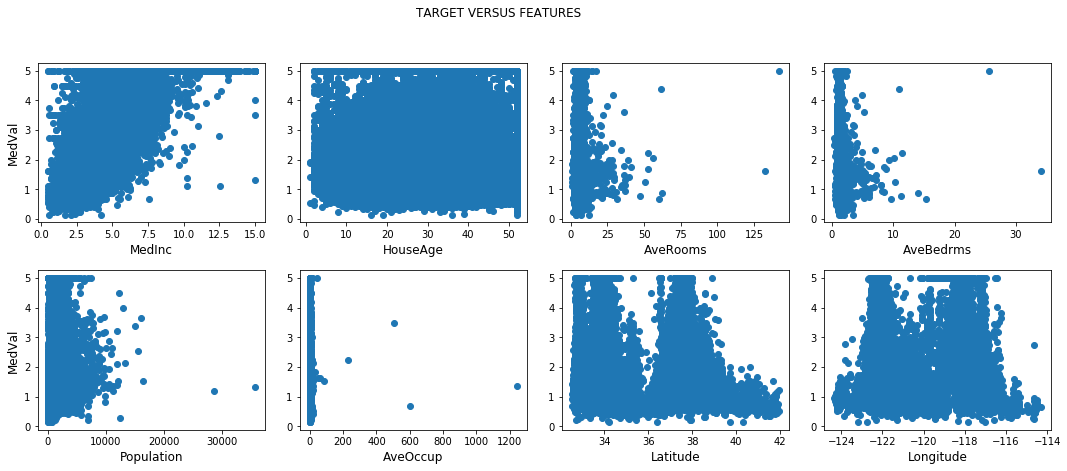

In [2]:
# ===========================================================================================
# This dataset was obtained from the StatLib repository. http://lib.stat.cmu.edu/datasets/
# This dataset was derived from the 1990 U.S. census, using one row per census block group. 
# A block group is the smallest geographical unit for which the U.S. Census Bureau publishes 
# sample data (a block group typically has a population of 600 to 3,000 people).
#
# FEATURES:
#        MedInc median income in block
#        HouseAge median house age in block
#        AveRooms average number of rooms
#        AveBedrms average number of bedrooms
#        Population block population
#        AveOccup average house occupancy
#        Latitude house block latitude
#        Longitude house block longitude
# 
# TARGET:
#        The target variable is the median house value for California districts
#
# sklearn.datasets.fetch_california_housing
# https://scikit-learn.org/stable/datasets/index.html#california-housing-dataset
# ===========================================================================================

RANDOM_STATE = 42

#X, y = datasets.fetch_california_housing(return_X_y=True)
data = datasets.fetch_california_housing()
X = data.data
y = data.target
feature_names = data.feature_names
target_name = 'MedVal'

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))

dfData = pd.DataFrame(np.concatenate((X, y.reshape(1, len(y)).T), axis=1), columns=feature_names+[target_name])

ncols = int(len(feature_names)/2)
nrows = int(len(feature_names)/ncols) + (1 if len(feature_names)%ncols != 0 else 0)
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=(16, 6))
fig.suptitle('TARGET VERSUS FEATURES')
plt.subplots_adjust(left=.1, right=.98, bottom=.001, top=.85, wspace=0.15, hspace=.3)
for index, feature in enumerate(feature_names):
    i = int(index/ncols)
    j = index%ncols    
    axes[i,j].scatter(dfData[feature],dfData[target_name])
    axes[i,j].set_xlabel(feature,fontdict={"fontsize":12})
    if(j==0): axes[i,j].set_ylabel(target_name,fontdict={"fontsize":12})

In [3]:
# ===========================================================================================
# Linear regression using the original features of the original dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

lre = LinearRegression()
lre.fit(X_train, y_train)
y_pred = lre.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Linear regressor using the original dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 20640
Number of features: 8
Linear regressor using the original dataset: R²=0.34, MSE=0.54


In [4]:
# ===========================================================================================
# Ridge regression using the original features of the original dataset
#
# sklearn.linear_model.Ridge
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.Ridge.html
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

rr = Ridge(alpha=1)
rr.fit(X_train, y_train)
y_pred = rr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Ridge regressor using the original dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 20640
Number of features: 8
Ridge regressor using the original dataset: R²=0.34, MSE=0.54


In [5]:
# ===========================================================================================
# RANSAC-based robust linear estimator using the original features of the original dataset
# 
# sklearn.linear_model.RANSACRegressor - RANSAC (RANdom SAmple Consensus) algorithm
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.RANSACRegressor.html#sklearn.linear_model.RANSACRegressor
#
# Robust linear estimator fitting
# https://scikit-learn.org/stable/auto_examples/linear_model/plot_robust_fit.html#sphx-glr-auto-examples-linear-model-plot-robust-fit-py
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

rsr = RANSACRegressor(min_samples=0.9, random_state=RANDOM_STATE)
rsr.fit(X_train, y_train)
y_pred = rsr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('RANSAC-based robust linear estimator using the original dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 20640
Number of features: 8
RANSAC-based robust linear estimator using the original dataset: R²=0.34, MSE=0.57


Number of samples: 20640
Number of features: 8
Multi-layer perceptron regressor using the original dataset: R²=0.42, MSE=0.50


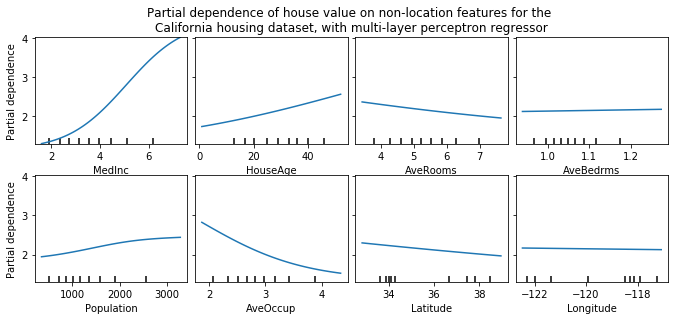

In [6]:
# ===========================================================================================
# Multi-layer perceptron regressor using the original features of the original dataset
# 
# sklearn.neural_network.MLPRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.neural_network.MLPRegressor.html#sklearn.neural_network.MLPRegressor
#
# Partial Dependence Plots
# https://scikit-learn.org/stable/auto_examples/inspection/plot_partial_dependence.html#sphx-glr-auto-examples-inspection-plot-partial-dependence-py
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

mlp = MLPRegressor(hidden_layer_sizes=(4,3), activation='logistic', tol=1e-5, max_iter=500, random_state=RANDOM_STATE)
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Multi-layer perceptron regressor using the original dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

# Partial dependence plot
fig, ax = plt.subplots(figsize=(10, 4))
fig = plt.gcf()
ax.set_title('Partial dependence of house value on non-location features for the \n'
             'California housing dataset, with multi-layer perceptron regressor')
plot_partial_dependence(mlp, dfData[feature_names], feature_names, n_cols=4, ax=ax)
plt.subplots_adjust(left=.1, right=.98, bottom=.001, top=.85, wspace=.05, hspace=.3)

Number of samples: 20640
Number of features: 8
Random forest regressor using the original dataset: R²=0.70, MSE=0.29


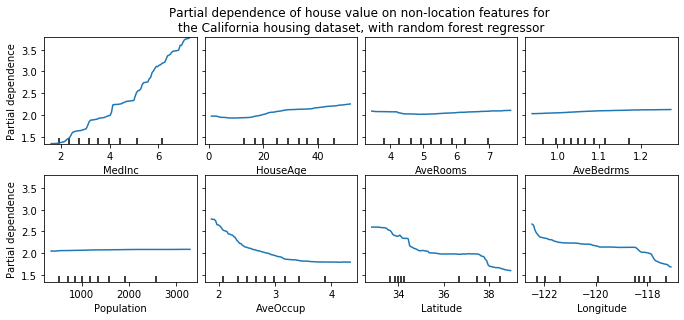

In [7]:
# ===========================================================================================
# Random forest regressor using the original features of the original dataset
# 
# 3.2.4.3.2. sklearn.ensemble.RandomForestRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html#sklearn.ensemble.RandomForestRegressor
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, criterion='mse', random_state=RANDOM_STATE)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Random forest regressor using the original dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

# Partial dependence plot
fig, ax = plt.subplots(figsize=(10, 4))
fig = plt.gcf()
ax.set_title('Partial dependence of house value on non-location features for \n'
             'the California housing dataset, with random forest regressor')
plot_partial_dependence(rfr, dfData[feature_names], feature_names, n_cols=4, ax=ax)
plt.subplots_adjust(left=.1, right=.98, bottom=.001, top=.85, wspace=.05, hspace=.3)

Number of samples: 20640
Number of features: 8
Gradient boosting regressor using the original dataset: R²=0.77, MSE=0.23


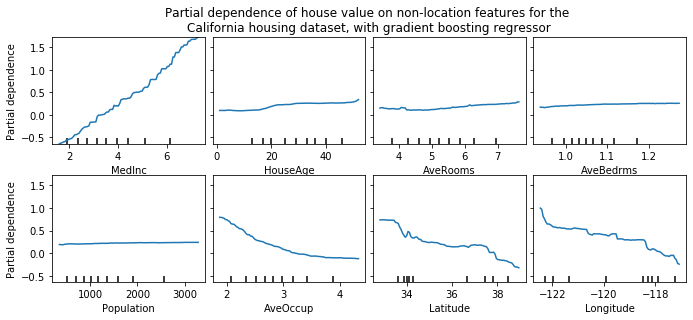

In [8]:
# ===========================================================================================
# Gradient boosting regressor using the original features of the original dataset
# 
# 3.2.4.3.6. sklearn.ensemble.GradientBoostingRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.GradientBoostingRegressor.html#sklearn.ensemble.GradientBoostingRegressor
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X)))
print('''Number of features: {}'''.format(X.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, loss='lad', learning_rate=0.1, criterion='mse', random_state=RANDOM_STATE)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Gradient boosting regressor using the original dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

# Partial dependence plot
fig, ax = plt.subplots(figsize=(10, 4))
fig = plt.gcf()
ax.set_title('Partial dependence of house value on non-location features for the \n'
             'California housing dataset, with gradient boosting regressor')
plot_partial_dependence(gbr, dfData[feature_names], feature_names, n_cols=4, ax=ax)
plt.subplots_adjust(left=.1, right=.98, bottom=.001, top=.85, wspace=.05, hspace=.3)

Number of the outliers detected by DBSCAN using feature 0 (MedInc): 184
Number of the outliers detected by DBSCAN using feature 1 (HouseAge): 77
Number of the outliers detected by DBSCAN using feature 2 (AveRooms): 292
Number of the outliers detected by DBSCAN using feature 3 (AveBedrms): 112
Number of the outliers detected by DBSCAN using feature 4 (Population): 488
Number of the outliers detected by DBSCAN using feature 5 (AveOccup): 25
Number of the outliers detected by DBSCAN using feature 6 (Latitude): 5
Number of the outliers detected by DBSCAN using feature 7 (Longitude): 78
Total number of the outliers detected by DBSCAN: 1261 (0.06 percent)


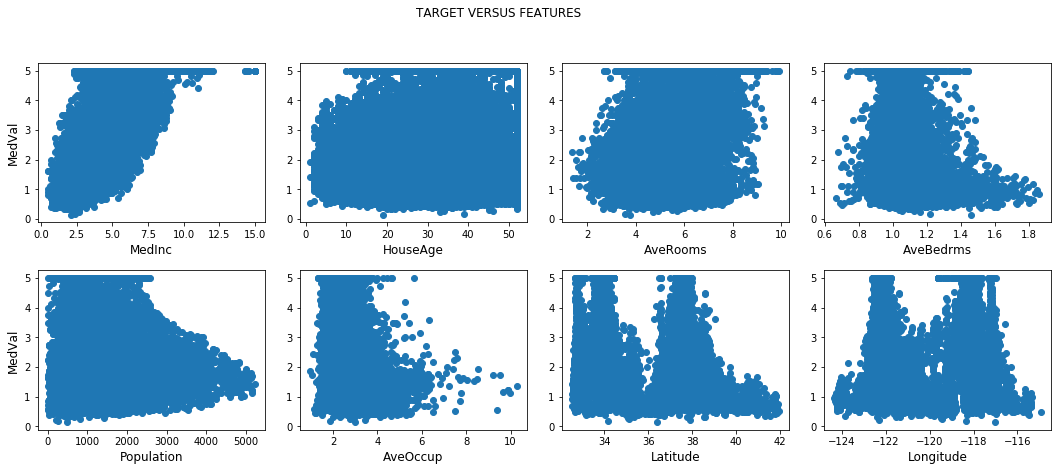

In [9]:
# ===========================================================================================
# Remove outliers based on DBSCAN clustering algorithm
# 
# Demo of DBSCAN clustering algorithm
# https://scikit-learn.org/stable/auto_examples/cluster/plot_dbscan.html#sphx-glr-auto-examples-cluster-plot-dbscan-py
# ===========================================================================================

X_scaled = StandardScaler().fit_transform(X)
y_scaled = StandardScaler().fit_transform(y.reshape(1, len(y)).T)

n_outliers = 0
X_clear = X.copy()
y_clear = y.copy()
X_scaled_clear = X_scaled.copy()
y_scaled_clear = y_scaled.copy()
for i in range(X.shape[1]):
    xy_scaled = np.concatenate((X_scaled_clear[:,i].reshape(1, len(y_scaled_clear)).T, y_scaled_clear.reshape(1, len(y_scaled_clear)).T), axis=1)
    # eps and min_samples were chosen to minimize the number of clusters and R² subject to number of outliers less than 10%
    db = DBSCAN(eps=0.3, min_samples=50).fit(xy_scaled)
    labels = db.labels_
    no_outlier_mask = (labels != -1)
    X_clear = X_clear[no_outlier_mask]
    y_clear = y_clear[no_outlier_mask]
    X_scaled_clear = X_scaled_clear[no_outlier_mask]
    y_scaled_clear = y_scaled_clear[no_outlier_mask]    
    n_outliers += sum(no_outlier_mask==False)    
    print('Number of the outliers detected by DBSCAN using feature %d (%s): %.0f' % (i, feature_names[i], sum(no_outlier_mask==False)))
    
print('Total number of the outliers detected by DBSCAN: %.0f (%.2f percent)' % (n_outliers, n_outliers/len(y)))

dfData_clear = pd.DataFrame(np.concatenate((X_clear, y_clear.reshape(1, len(y_clear)).T), axis=1), columns=feature_names+[target_name])

ncols = int(len(feature_names)/2)
nrows = int(len(feature_names)/ncols) + (1 if len(feature_names)%ncols != 0 else 0)
fig, axes = plt.subplots(nrows=nrows,ncols=ncols, figsize=(16, 6))
fig.suptitle('TARGET VERSUS FEATURES')
plt.subplots_adjust(left=.1, right=.98, bottom=.001, top=.85, wspace=0.15, hspace=.3)
for index, feature in enumerate(feature_names):
    i = int(index/ncols)
    j = index%ncols    
    axes[i,j].scatter(dfData_clear[feature],dfData_clear[target_name])
    axes[i,j].set_xlabel(feature,fontdict={"fontsize":12})
    if(j==0): axes[i,j].set_ylabel(target_name,fontdict={"fontsize":12})

In [10]:
# ===========================================================================================
# Gradient boosting regressor using the original features of the clean dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear)))
print('''Number of features: {}'''.format(X_clear.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear, y_clear, test_size=0.25, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, loss='lad', learning_rate=0.1, criterion='mse', random_state=RANDOM_STATE)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Gradient boosting regressor using original features\n'
      'of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 8
Gradient boosting regressor using original features
of the clean dataset: R²=0.81, MSE=0.19


In [11]:
# ===========================================================================================
# Random forest regressor using the original features of the clean dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear)))
print('''Number of features: {}'''.format(X_clear.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear, y_clear, test_size=0.25, random_state=RANDOM_STATE)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, criterion='mse', random_state=RANDOM_STATE)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Random forest regressor using original features\n'
      'of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 8
Random forest regressor using original features
of the clean dataset: R²=0.75, MSE=0.24


Quantiles [0, 25, 50, 75, 100] for y clean: [0.14999 1.196   1.797   2.64725 5.00001]
Quantiles [0, 25, 50, 75, 100] for y clean transformed: [0.13975325 0.78298788 1.02173124 1.27620044 1.79176114]


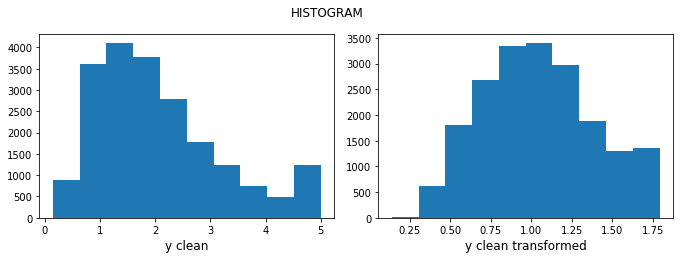

In [12]:
# ===========================================================================================
# Transforme the target to map to a Gaussian distribution
# 
# Effect of transforming the targets in regression model
# https://scikit-learn.org/stable/auto_examples/compose/plot_transformed_target.html#sphx-glr-auto-examples-compose-plot-transformed-target-py
#
# 6.3.2.1. Mapping to a Uniform distribution
# https://scikit-learn.org/stable/modules/preprocessing.html#mapping-to-a-uniform-distribution
#
# sklearn.preprocessing.FunctionTransformer
# https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.FunctionTransformer.html#sklearn.preprocessing.FunctionTransformer
# ===========================================================================================

'''
from sklearn.preprocessing import QuantileTransformer

quantile_transformer = QuantileTransformer(random_state=0)
y_trans = quantile_transformer.fit_transform(y_clear.reshape(1, len(y_clear)).T)

from sklearn.preprocessing import PowerTransformer

trans = PowerTransformer(method='box-cox', standardize=False)
y_trans = trans.fit_transform(y_clear.reshape(1, len(y_clear)).T)
'''

trans = FunctionTransformer(func=np.log1p, inverse_func=np.expm1, validate=False)
y_clear_trans = trans.fit_transform(y_clear)

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 3))
fig.suptitle('HISTOGRAM')
plt.subplots_adjust(left=.1, right=.98, bottom=.001, top=.85, wspace=0.15, hspace=.3)
axes[0].hist(y)
axes[0].set_xlabel('y clean',fontdict={"fontsize":12})
axes[1].hist(y_clear_trans)
axes[1].set_xlabel('y clean transformed',fontdict={"fontsize":12})

quantiles = [0, 25, 50, 75, 100]
print('''Quantiles {} for y clean: {}'''.format(quantiles, np.percentile(y, quantiles)))
print('''Quantiles {} for y clean transformed: {}'''.format(quantiles, np.percentile(y_clear_trans, quantiles)))

In [13]:
# ===========================================================================================
# Gradient boosting regressor using the original features and transformed target of the clean 
# dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear)))
print('''Number of features: {}'''.format(X_clear.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, loss='lad', learning_rate=0.1, criterion='mse', random_state=RANDOM_STATE)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Gradient boosting regressor using original features\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 8
Gradient boosting regressor using original features
and transformed target of the clean dataset: R²=0.82, MSE=0.02


In [14]:
# ===========================================================================================
# Random forest regressor using the original features and transformed target of the clean 
# dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear)))
print('''Number of features: {}'''.format(X_clear.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, criterion='mse', random_state=RANDOM_STATE)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Random forest regressor using original features\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 8
Random forest regressor using original features
and transformed target of the clean dataset: R²=0.78, MSE=0.02


In [15]:
# ===========================================================================================
# Generating polynomial features
# 
# 6.3.7. Generating polynomial features
# https://scikit-learn.org/stable/modules/preprocessing.html
# ===========================================================================================

poly = PolynomialFeatures(degree=2, interaction_only=False, include_bias=False)
X_clear_poly = poly.fit_transform(X_clear)

print('''Number of samples: {}'''.format(len(X_clear_poly)))
print('''Number of features: {}'''.format(X_clear_poly.shape[1]))

feature_poly_names = []
for powers in poly.powers_:
    feature_name = ''
    for i in range(poly.n_input_features_):
        power_i = powers[i]
        feature_i = feature_names[i]
        if(power_i != 0):
            feature_name = feature_name + feature_i + str(power_i)
    if(feature_name == ''):
        feature_poly_names += ['baias']
    else:
        feature_poly_names += [feature_name]
        
dfData_clean = pd.DataFrame(np.concatenate((X_clear_poly, y_clear_trans.reshape(1, len(y_clear_trans)).T), axis=1), columns=feature_poly_names+[target_name])
dfData_clean.head(5)

Number of samples: 19379
Number of features: 44


,MedInc1,HouseAge1,AveRooms1,AveBedrms1,Population1,AveOccup1,Latitude1,Longitude1,MedInc2,MedInc1HouseAge1,...,Population1AveOccup1,Population1Latitude1,Population1Longitude1,AveOccup2,AveOccup1Latitude1,AveOccup1Longitude1,Latitude2,Latitude1Longitude1,Longitude2,MedVal
0,8.3252,41.0,6.984127,1.023810,322.0,2.555556,37.88,-122.23,69.308955,341.3332,...,822.888889,12197.36,-39358.06,6.530864,96.804444,-312.365556,1434.8944,-4630.0724,14940.1729,1.709464
1,8.3014,21.0,6.238137,0.971880,2401.0,2.109842,37.86,-122.22,68.913242,174.3294,...,5065.730228,90901.86,-293450.22,4.451433,79.878612,-257.864868,1433.3796,-4627.2492,14937.7284,1.522790
2,7.2574,52.0,8.288136,1.073446,496.0,2.802260,37.85,-122.24,52.669855,377.3848,...,1389.920904,18773.60,-60631.04,7.852660,106.065537,-342.548249,1432.6225,-4626.7840,14942.6176,1.508733
3,5.6431,52.0,5.817352,1.073059,558.0,2.547945,37.85,-122.25,31.844578,293.4412,...,1421.753425,21120.30,-68215.50,6.492025,96.439726,-311.486301,1432.6225,-4627.1625,14945.0625,1.484555
4,3.8462,52.0,6.281853,1.081081,565.0,2.181467,37.85,-122.25,14.793254,200.0024,...,1232.528958,21385.25,-69071.25,4.758799,82.568533,-266.684363,1432.6225,-4627.1625,14945.0625,1.486592


In [16]:
# ===========================================================================================
# Gradient boosting regressor using the polynomial features and transformed target of the 
# clean dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear_poly)))
print('''Number of features: {}'''.format(X_clear_poly.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear_poly, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, loss='lad', learning_rate=0.1, criterion='mse', random_state=RANDOM_STATE)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Gradient boosting regressor using polynomial features\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 44
Gradient boosting regressor using polynomial features
and transformed target of the clean dataset: R²=0.82, MSE=0.02


In [17]:
# ===========================================================================================
# Random forest regressor using the polynomial features and transformed target of the 
# clean dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear_poly)))
print('''Number of features: {}'''.format(X_clear_poly.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear_poly, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, criterion='mse', random_state=RANDOM_STATE)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Random forest regressor using polynomial features\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 44
Random forest regressor using polynomial features
and transformed target of the clean dataset: R²=0.77, MSE=0.02


Selected 13 most important features (from 44) whose total importante is 0.90:
['MedInc1Longitude1' 'AveRooms1AveOccup1' 'AveOccup1Latitude1'
 'MedInc1AveBedrms1' 'MedInc1' 'MedInc2' 'MedInc1HouseAge1' 'Longitude1'
 'Longitude2' 'Latitude2' 'Latitude1' 'AveRooms1Latitude1'
 'Latitude1Longitude1']


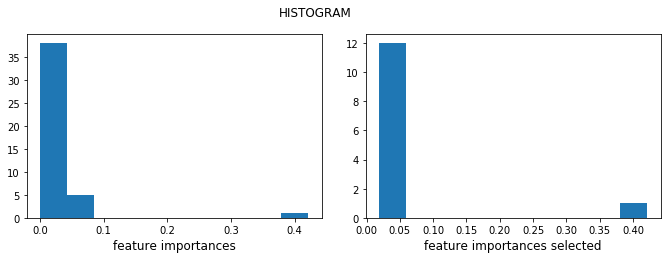

In [18]:
# ===========================================================================================
# Feature selection based on: 
#     1. PPS (Predictive Power Score)
#     2. Feature importance
#
# Feature Selection with sklearn and Pandas
# https://towardsdatascience.com/feature-selection-with-pandas-e3690ad8504b
#
# RIP correlation. Introducing the Predictive Power Score
# https://towardsdatascience.com/rip-correlation-introducing-the-predictive-power-score-3d90808b9598
# https://pypi.org/project/ppscore/
# ===========================================================================================

'''
pps = []
for feature in feature_poly_names:
    pps.append(ppscore.score(dfData_clean, feature, target_name, task='regression', sample=100)['ppscore'])
   
pps_threshold = 0

feature_poly_selected = np.array(feature_poly_names)[np.array(pps) > pps_threshold]
print('Selected features: \n', feature_poly_selected)

X_clear_poly_selected = dfData_clean[feature_poly_selected].values
'''

feature_importances = np.array(rfr.feature_importances_)

fi_per_f = [(feature_importances[i], feature_poly_names[i]) for i in range(len(feature_importances))]
fi_per_f.sort(reverse=True)
fi_per_f = np.array(fi_per_f,  dtype="O")

threshold_total_importance = 0.90
for index in range(len((fi_per_f))):
    if(sum(fi_per_f[:,0][:index+1])>=threshold_total_importance):
        index_to_cutoff = index
        break
        
feature_importances_selected = fi_per_f[:,0][:index_to_cutoff+1]
feature_poly_selected = fi_per_f[:,1][:index_to_cutoff+1]

fig, axes = plt.subplots(nrows=1,ncols=2, figsize=(10, 3))
fig.suptitle('HISTOGRAM')
plt.subplots_adjust(left=.1, right=.98, bottom=.001, top=.85, wspace=0.15, hspace=.3)
axes[0].hist(feature_importances)
axes[0].set_xlabel('feature importances',fontdict={"fontsize":12})
axes[1].hist(feature_importances_selected)
axes[1].set_xlabel('feature importances selected',fontdict={"fontsize":12})

print('Selected %.d most important features (from %.d) whose total importante is %.2f:' % (index_to_cutoff+1, len(feature_poly_names), threshold_total_importance))
print(feature_poly_selected)

X_clear_poly_selected = dfData_clean[feature_poly_selected].values

In [19]:
# ===========================================================================================
# Gradient boosting regressor using the selected polynomial features and transformed target 
# of the clean dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear_poly_selected)))
print('''Number of features: {}'''.format(X_clear_poly_selected.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear_poly_selected, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, loss='lad', learning_rate=0.1, criterion='mse', random_state=RANDOM_STATE)
gbr.fit(X_train, y_train)
y_pred = gbr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Gradient boosting regressor using selected polynomial features\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 13
Gradient boosting regressor using selected polynomial features
and transformed target of the clean dataset: R²=0.83, MSE=0.02


In [20]:
# ===========================================================================================
# Random forest regressor using the selected polynomial features and transformed target 
# of the clean dataset
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear_poly_selected)))
print('''Number of features: {}'''.format(X_clear_poly_selected.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear_poly_selected, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, criterion='mse', random_state=RANDOM_STATE)
rfr.fit(X_train, y_train)
y_pred = rfr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Random forest regressor using selected polynomial features\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 13
Random forest regressor using selected polynomial features
and transformed target of the clean dataset: R²=0.78, MSE=0.02


In [21]:
# ===========================================================================================
# Voting regressor based on the presented regression techniques using the selected polynomial 
# features and transformed target of the clean dataset
#
# sklearn.ensemble.VotingRegressor
# https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.VotingRegressor.html#sklearn.ensemble.VotingRegressor
#
# 1.11. Ensemble methods
# https://scikit-learn.org/stable/modules/ensemble.html#b1998
# ===========================================================================================

print('''Number of samples: {}'''.format(len(X_clear_poly_selected)))
print('''Number of features: {}'''.format(X_clear_poly_selected.shape[1]))

X_train, X_test, y_train, y_test = train_test_split(X_clear_poly_selected, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

gbr = GradientBoostingRegressor(n_estimators=100, max_depth=10, loss='lad', learning_rate=0.1, criterion='mse', random_state=RANDOM_STATE)

rfr = RandomForestRegressor(n_estimators=100, max_depth=10, criterion='mse', random_state=RANDOM_STATE)

mlp = MLPRegressor(hidden_layer_sizes=(4,3), activation='logistic', tol=1e-5, max_iter=500, random_state=RANDOM_STATE)

rr = Ridge(alpha=1)

lre = LinearRegression()

vr = VotingRegressor(estimators=[('gb', gbr), ('rf', rfr), ('mlp', mlp), ('rr', rr), ('lr', lre)], weights=[2,2,0,1,1])

vr.fit(X_train, y_train)
y_pred = vr.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Voting regressor using selected polynomial features\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (r2, mse))

Number of samples: 19379
Number of features: 13
Voting regressor using selected polynomial features
and transformed target of the clean dataset: R²=0.78, MSE=0.02


In [23]:
# ===========================================================================================
# Linear regression using the scaled polynomial features and transformed target of the clean 
# dataset through a pipeline
# ===========================================================================================

# Data spliting into train and test
X_train, X_test, y_train, y_test = train_test_split(X_clear, y_clear_trans, test_size=0.25, random_state=RANDOM_STATE)

# Make the pipeline for scaling, computing polynomial features and regression

degree=4 # Increase the degree from 4 decrease the R²
poly = PolynomialFeatures(degree=degree, interaction_only=False)

sc = StandardScaler()

lre = LinearRegression()

pl = make_pipeline(poly, sc, lre)

# Fit to data and predict using the pipeline

pl.fit(X_train, y_train)
y_pred = pl.predict(X_test)

mse = mean_squared_error(y_pred,y_test)
r2 = r2_score(y_pred,y_test)
print('Linear regressor using polynomial features of degree %d\n'
      'and transformed target of the clean dataset: R²=%.2f, MSE=%.2f' % (degree, r2, mse))

Linear regressor using polynomial features of degree 4
and transformed target of the clean dataset: R²=0.75, MSE=0.03
